## 세종시 상권 분석 

In [2]:
import pandas as pd

In [4]:
com_area=pd.read_csv('./Data/14.세종시_상권정보.csv')
com_code=pd.read_csv('./Data/15.세종시_상권정보_업종코드.csv')

In [5]:
com_area.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10773 entries, 0 to 10772
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상권업종대분류코드  10773 non-null  object 
 1   상권업종대분류명   10773 non-null  object 
 2   상권업종중분류코드  10773 non-null  object 
 3   상권업종중분류명   10773 non-null  object 
 4   상권업종소분류코드  10773 non-null  object 
 5   상권업종소분류명   10773 non-null  object 
 6   표준산업분류코드   10169 non-null  object 
 7   표준산업분류명    10169 non-null  object 
 8   행정동코드      10773 non-null  int64  
 9   행정동명       10773 non-null  object 
 10  도로명주소      10773 non-null  object 
 11  lon        10773 non-null  float64
 12  lat        10773 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [6]:
com_area.head() 

,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,행정동코드,행정동명,도로명주소,lon,lat
0,D,소매,D21,철물/난방/건설자재소매,D21A06,철물/건설자재소매,G47511,철물 및 난방용구 소매업,3611025000,조치원읍,"세종특별자치시 조치원읍 새내로 90-1, (정리)",127.298552,36.599920
1,D,소매,D21,철물/난방/건설자재소매,D21A02,보일러/냉난방용품,G47511,철물 및 난방용구 소매업,3611037000,전의면,"세종특별자치시 전의면 왕의물로 40, (동교리)",127.204298,36.682526
2,F,생활서비스,F15,주택수리,F15A03,배관난방보일러,F42201,배관 및 냉·난방 공사업,3611036000,연서면,"세종특별자치시 연서면 당산로 322, (봉암리)",127.280990,36.560523
3,Q,음식,Q04,분식,Q04A01,라면김밥분식,I56194,분식 및 김밥 전문점,3611034000,금남면,"세종특별자치시 금남면 채나무길 61-3, (국곡리)",127.270561,36.426637
4,D,소매,D11,유아용품,D11A03,유아용품판매,G47599,그외 기타 분류안된 가정용품 소매업,3611025000,조치원읍,"세종특별자치시 조치원읍 충현로 159, (침산리, 욱일2차)",127.294177,36.602922


## 세종시 상권 대분류 분석 

In [7]:
large_area=com_area[['상권업종대분류명','행정동명','lon','lat']]
large_area['count']=1 
large_area

<ipython-input-7-903f5b3aba54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large_area['count']=1


,상권업종대분류명,행정동명,lon,lat,count
0,소매,조치원읍,127.298552,36.599920,1
1,소매,전의면,127.204298,36.682526,1
2,생활서비스,연서면,127.280990,36.560523,1
3,음식,금남면,127.270561,36.426637,1
4,소매,조치원읍,127.294177,36.602922,1
...,...,...,...,...,...
10768,소매,조치원읍,127.299415,36.593481,1
10769,부동산,금남면,127.333858,36.480396,1
10770,음식,고운동,127.235897,36.500933,1
10771,관광/여가/오락,보람동,127.289353,36.477949,1


In [8]:
large_gb=large_area.groupby(['상권업종대분류명'])['count'].count().reset_index()
large_gb

,상권업종대분류명,count
0,관광/여가/오락,200
1,부동산,783
2,생활서비스,1587
3,소매,3003
4,숙박,74
5,스포츠,30
6,음식,4342
7,학문/교육,754


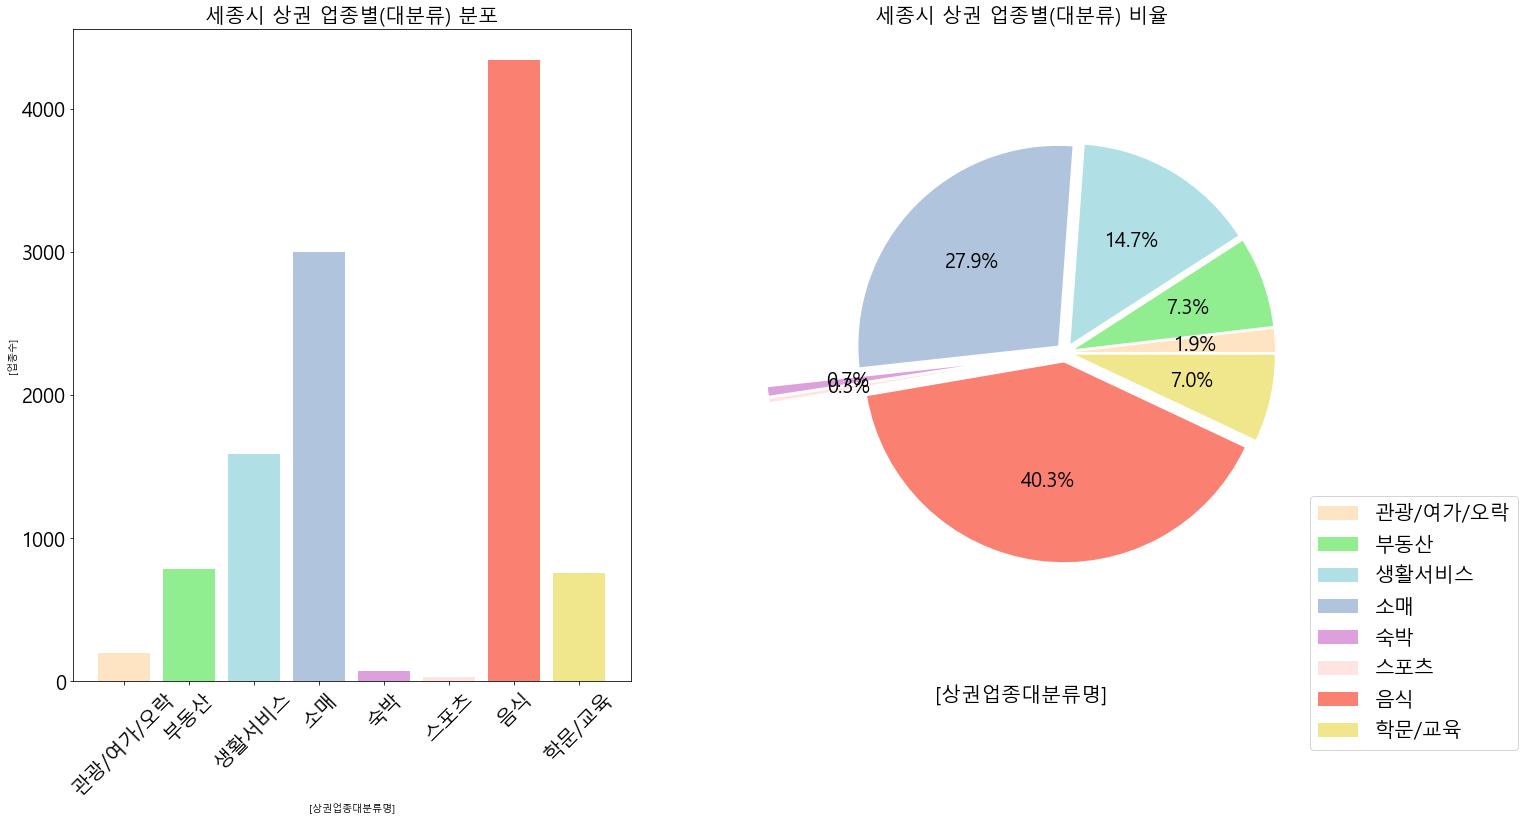

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl  
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

plt.figure(figsize=(22,12))
plt.subplot(121)
colors = ['bisque','lightgreen','powderblue','lightsteelblue','plum','mistyrose','salmon','khaki']
plt.bar(large_gb['상권업종대분류명'],large_gb['count'],color=colors)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.title('세종시 상권 업종별(대분류) 분포',fontsize=20)
plt.xlabel('[상권업종대분류명]')
plt.ylabel('[업종수]')

plt.subplot(122)
plt.rcParams['figure.figsize'] = [12, 12]
explode = [0.05, 0.05, 0.05, 0.05,0.5, 0.5, 0.05, 0.05]
categories=large_gb['상권업종대분류명'].tolist() 
plt.pie(large_gb['count'].tolist(),autopct='%0.1f%%',
        colors = ['bisque','lightgreen','powderblue','lightsteelblue','plum','mistyrose','salmon','khaki'],
        textprops={'fontsize': 20},explode=explode) 
plt.axis('equal')
plt.xlabel('[상권업종대분류명]',fontsize=20)
plt.title('세종시 상권 업종별(대분류) 비율',fontsize=20)
plt.rcParams['font.size'] = 20
plt.legend(large_gb['상권업종대분류명'].tolist(),bbox_to_anchor=(1, 0.3))
plt.show() 

## 세종시 상권 업종 중분류 분석  

In [10]:
mid_area=com_area[['상권업종중분류명','행정동명','lon','lat']]
mid_area['count']=1 
mid_area 

<ipython-input-10-47238da3cba0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_area['count']=1


,상권업종중분류명,행정동명,lon,lat,count
0,철물/난방/건설자재소매,조치원읍,127.298552,36.599920,1
1,철물/난방/건설자재소매,전의면,127.204298,36.682526,1
2,주택수리,연서면,127.280990,36.560523,1
3,분식,금남면,127.270561,36.426637,1
4,유아용품,조치원읍,127.294177,36.602922,1
...,...,...,...,...,...
10768,자동차/자동차용품,조치원읍,127.299415,36.593481,1
10769,부동산중개,금남면,127.333858,36.480396,1
10770,양식,고운동,127.235897,36.500933,1
10771,무도/유흥/가무,보람동,127.289353,36.477949,1


In [11]:
mid_gb=mid_area.groupby(['상권업종중분류명'])['count'].count().reset_index()
mid_gb_10=mid_gb.sort_values(['count'],ascending=False)[:10]
mid_gb_10

,상권업종중분류명,count
81,한식,1729
59,종합소매점,892
51,이/미용/건강,783
22,부동산중개,753
68,커피점/카페,497
47,음/식료품소매,457
24,분식,393
46,유흥주점,363
14,닭/오리요리,342
30,세탁/가사서비스,304


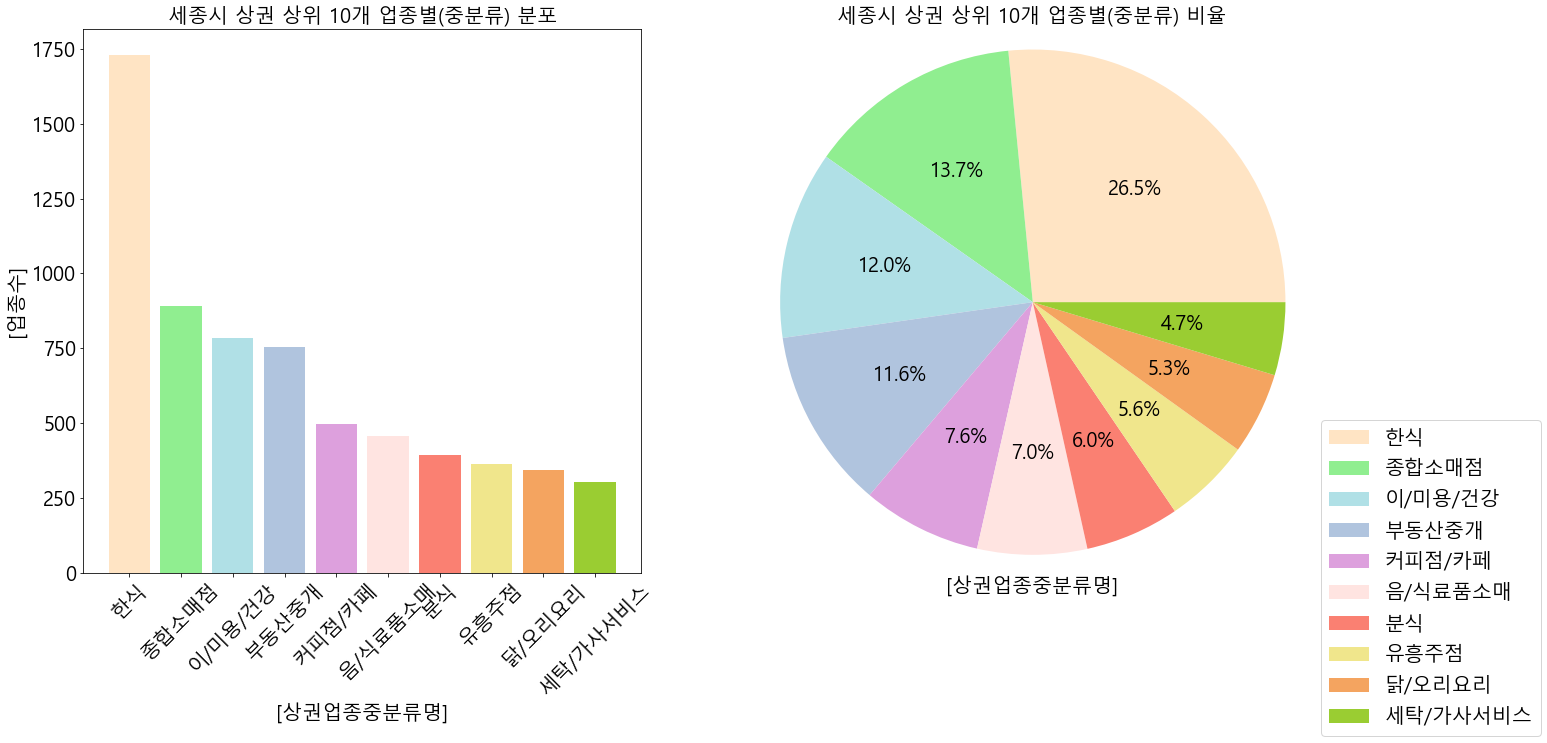

In [12]:
plt.figure(figsize=(22,10))
plt.subplot(121)
colors = ['bisque','lightgreen','powderblue','lightsteelblue','plum','mistyrose','salmon',
                  'khaki','sandybrown','yellowgreen']
plt.bar(mid_gb_10['상권업종중분류명'],mid_gb_10['count'],color=colors)
plt.xticks(rotation=45)
plt.title('세종시 상권 상위 10개 업종별(중분류) 분포',fontsize=20)
plt.xlabel('[상권업종중분류명]')
plt.ylabel('[업종수]')

plt.subplot(122)
plt.rcParams['figure.figsize'] = [12, 12]
categories=mid_gb_10['상권업종중분류명'].tolist()
explode = [0.05, 0.05, 0.05, 0.05,0.5, 0.5, 0.05, 0.05]
plt.pie(mid_gb_10['count'].tolist(),autopct='%0.1f%%', 
        colors = ['bisque','lightgreen','powderblue','lightsteelblue','plum','mistyrose','salmon',
                  'khaki','sandybrown','yellowgreen'],
        textprops={'fontsize': 20})
plt.axis('equal')
plt.xlabel('[상권업종중분류명]',fontsize=20)
plt.title('세종시 상권 상위 10개 업종별(중분류) 비율',fontsize=20) 
plt.legend(mid_gb_10['상권업종중분류명'].tolist(),bbox_to_anchor=(1, 0.3)) 

plt.show()

## 세종시 상권 업종 소분류 분석 

In [13]:
small_area=com_area[['상권업종소분류명','행정동명','lon','lat']]
small_area['count']=1 
small_area

<ipython-input-13-71e7a0f07a5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_area['count']=1


,상권업종소분류명,행정동명,lon,lat,count
0,철물/건설자재소매,조치원읍,127.298552,36.599920,1
1,보일러/냉난방용품,전의면,127.204298,36.682526,1
2,배관난방보일러,연서면,127.280990,36.560523,1
3,라면김밥분식,금남면,127.270561,36.426637,1
4,유아용품판매,조치원읍,127.294177,36.602922,1
...,...,...,...,...,...
10768,타이어판매,조치원읍,127.299415,36.593481,1
10769,부동산중개,금남면,127.333858,36.480396,1
10770,돈가스전문점,고운동,127.235897,36.500933,1
10771,노래방,보람동,127.289353,36.477949,1


In [14]:
small_gb=small_area.groupby(['상권업종소분류명'])['count'].count().reset_index()
small_gb_10=small_gb.sort_values(['count'],ascending=False)[:10]
small_gb_10

,상권업종소분류명,count
370,한식/백반/한정식,1064
125,부동산중개,753
318,커피전문점/카페/다방,485
209,여성미용실,482
287,종합소매,302
340,편의점,264
392,후라이드/양념치킨,242
384,호프/맥주,232
91,라면김밥분식,215
307,청과물소매,202


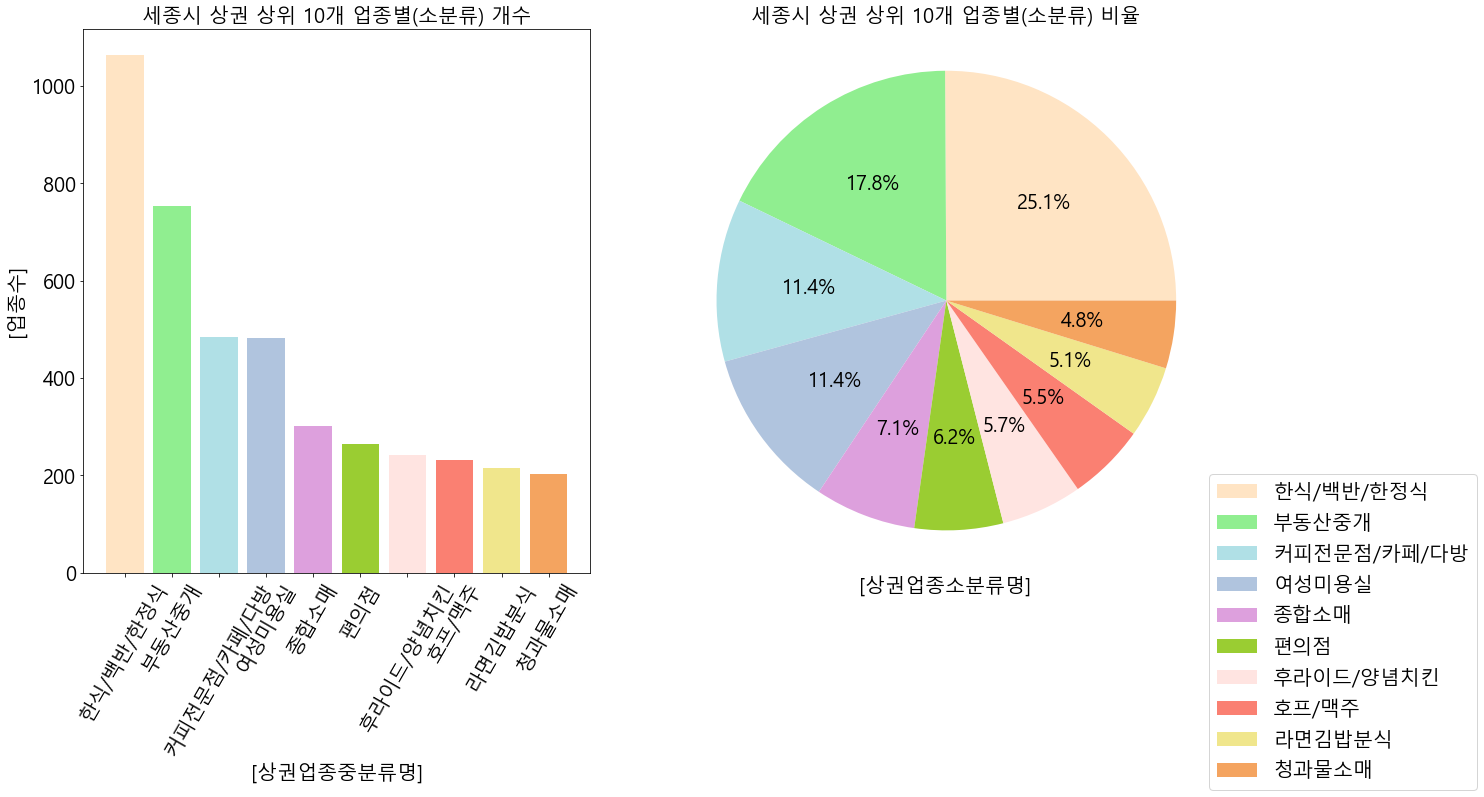

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(121)
colors = ['bisque','lightgreen','powderblue','lightsteelblue','plum',
          'yellowgreen','mistyrose','salmon','khaki','sandybrown']
plt.bar(small_gb_10['상권업종소분류명'],small_gb_10['count'],color=colors)
plt.xticks(rotation=60,fontsize=20) 
plt.title('세종시 상권 상위 10개 업종별(소분류) 개수',fontsize=20)
plt.xlabel('[상권업종중분류명]')
plt.ylabel('[업종수]')

plt.subplot(122)
categories=small_gb_10['상권업종소분류명'].tolist()
plt.pie(small_gb_10['count'].tolist(),autopct='%0.1f%%',
colors = ['bisque','lightgreen','powderblue','lightsteelblue','plum','yellowgreen','mistyrose','salmon','khaki','sandybrown'],
        textprops={'fontsize': 20})
plt.axis('equal')
plt.xlabel('[상권업종소분류명]',fontsize=20)
plt.rcParams['font.size'] = 20
plt.title('세종시 상권 상위 10개 업종별(소분류) 비율',fontsize=20)
plt.legend(small_gb_10['상권업종소분류명'].tolist(),bbox_to_anchor=(1, 0.2))

plt.show()

## 세종시 5개동 상권 업종 대분류 분석 

In [16]:
import seaborn as sns

In [17]:
population=pd.read_csv('Data/28.세종시_지역별_세대원수별_세대수.csv')
population.sort_values(['계'],ascending=False).head(5)

,읍면동,계,1인,2인,3인,4인,5인,6인,7인,8인,9인,10인이상
11,새 롬 동,20495,6019,3980,4283,4754,1201,201,39,12,4,2
0,조치원읍,19472,8295,4165,3042,2729,944,220,63,9,4,1
12,도 담 동,13136,5002,2117,2383,2825,667,106,29,3,4,0
15,고 운 동,11436,2025,2341,2839,3240,814,145,19,7,4,2
16,소 담 동,10973,2754,2268,2597,2545,671,106,27,1,1,3


In [18]:
com_area.head() 

,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,행정동코드,행정동명,도로명주소,lon,lat
0,D,소매,D21,철물/난방/건설자재소매,D21A06,철물/건설자재소매,G47511,철물 및 난방용구 소매업,3611025000,조치원읍,"세종특별자치시 조치원읍 새내로 90-1, (정리)",127.298552,36.599920
1,D,소매,D21,철물/난방/건설자재소매,D21A02,보일러/냉난방용품,G47511,철물 및 난방용구 소매업,3611037000,전의면,"세종특별자치시 전의면 왕의물로 40, (동교리)",127.204298,36.682526
2,F,생활서비스,F15,주택수리,F15A03,배관난방보일러,F42201,배관 및 냉·난방 공사업,3611036000,연서면,"세종특별자치시 연서면 당산로 322, (봉암리)",127.280990,36.560523
3,Q,음식,Q04,분식,Q04A01,라면김밥분식,I56194,분식 및 김밥 전문점,3611034000,금남면,"세종특별자치시 금남면 채나무길 61-3, (국곡리)",127.270561,36.426637
4,D,소매,D11,유아용품,D11A03,유아용품판매,G47599,그외 기타 분류안된 가정용품 소매업,3611025000,조치원읍,"세종특별자치시 조치원읍 충현로 159, (침산리, 욱일2차)",127.294177,36.602922


In [19]:
ad_area=com_area[['행정동명','상권업종대분류명']]
ad_area['count']=1
ad_area

<ipython-input-19-a26f0f2f0f62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_area['count']=1


,행정동명,상권업종대분류명,count
0,조치원읍,소매,1
1,전의면,소매,1
2,연서면,생활서비스,1
3,금남면,음식,1
4,조치원읍,소매,1
...,...,...,...
10768,조치원읍,소매,1
10769,금남면,부동산,1
10770,고운동,음식,1
10771,보람동,관광/여가/오락,1


In [20]:
ad_gb=ad_area.groupby(['행정동명','상권업종대분류명'])['count'].count().reset_index()
#세종시 인구 상위 5개 행정동 : 조치원읍 , 

saerom_cm=ad_gb[ad_gb['행정동명']=='새롬동'].sort_values(['count'],ascending=False).head(3)
cho_cm=ad_gb[ad_gb['행정동명']=='조치원읍'].sort_values(['count'],ascending=False).head(3)
do_cm=ad_gb[ad_gb['행정동명']=='도담동'].sort_values(['count'],ascending=False).head(3)
go_cm=ad_gb[ad_gb['행정동명']=='고운동'].sort_values(['count'],ascending=False).head(3)
so_cm=ad_gb[ad_gb['행정동명']=='소담동'].sort_values(['count'],ascending=False).head(3)

sum_ad=pd.concat([saerom_cm,cho_cm,do_cm,go_cm,so_cm])
sum_ad['count_sum'] = sum_ad.groupby(['행정동명'])['count'].cumsum(axis=0)
sum_ad = sum_ad.set_index('행정동명')

<AxesSubplot:title={'center':'인구수 상위 5개 행정동의 상권 대분류별 누적 분포'}, xlabel='행정동명'>

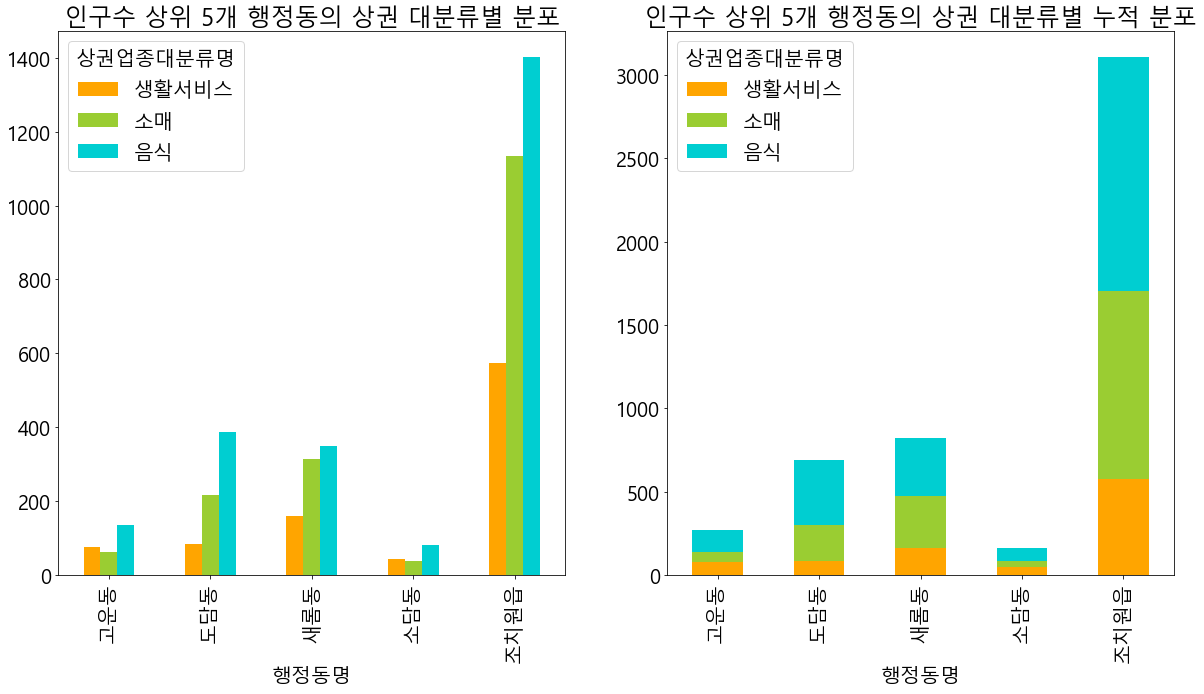

In [21]:
fig = plt.figure(figsize=(20, 10)) 
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2)
ax1.set_title('인구수 상위 5개 행정동의 상권 대분류별 분포') 
ax2.set_title('인구수 상위 5개 행정동의 상권 대분류별 누적 분포') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
colors = ['orange','yellowgreen','darkturquoise'] 
sum_ad.set_index('상권업종대분류명',append=True)['count'].unstack().plot.bar(ax=ax1,color=colors)
sum_ad.set_index('상권업종대분류명',append=True)['count'].unstack().plot.bar(ax=ax2,
                                                                         color=colors,stacked = True)

## 세종시 5개동 상권 업종 중분류 분석  

In [22]:
ad_area_mid=com_area[['행정동명','상권업종중분류명']]
ad_area_mid['count']=1
ad_gb_mid=ad_area_mid.groupby(['행정동명','상권업종중분류명'])['count'].count().reset_index()

<ipython-input-22-8c98610567ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_area_mid['count']=1


In [23]:
saerom_cm_mid=ad_gb_mid[ad_gb_mid['행정동명']=='새롬동'].sort_values(['count'],ascending=False).head(3)
cho_cm_mid=ad_gb_mid[ad_gb_mid['행정동명']=='조치원읍'].sort_values(['count'],ascending=False).head(3)
do_cm_mid=ad_gb_mid[ad_gb_mid['행정동명']=='도담동'].sort_values(['count'],ascending=False).head(3)
go_cm_mid=ad_gb_mid[ad_gb_mid['행정동명']=='고운동'].sort_values(['count'],ascending=False).head(3)
so_cm_mid=ad_gb_mid[ad_gb_mid['행정동명']=='소담동'].sort_values(['count'],ascending=False).head(3)

In [24]:
sum_ad_mid=pd.concat([saerom_cm_mid,cho_cm_mid,do_cm_mid,go_cm_mid,so_cm_mid])
sum_ad_mid['count_sum'] = sum_ad_mid.groupby(['행정동명'])['count'].cumsum(axis=0)
sum_ad_mid = sum_ad_mid.set_index('행정동명')

<AxesSubplot:title={'center':'인구수 상위 행정동의 상권 중분류별 누적 분포'}, xlabel='행정동명'>

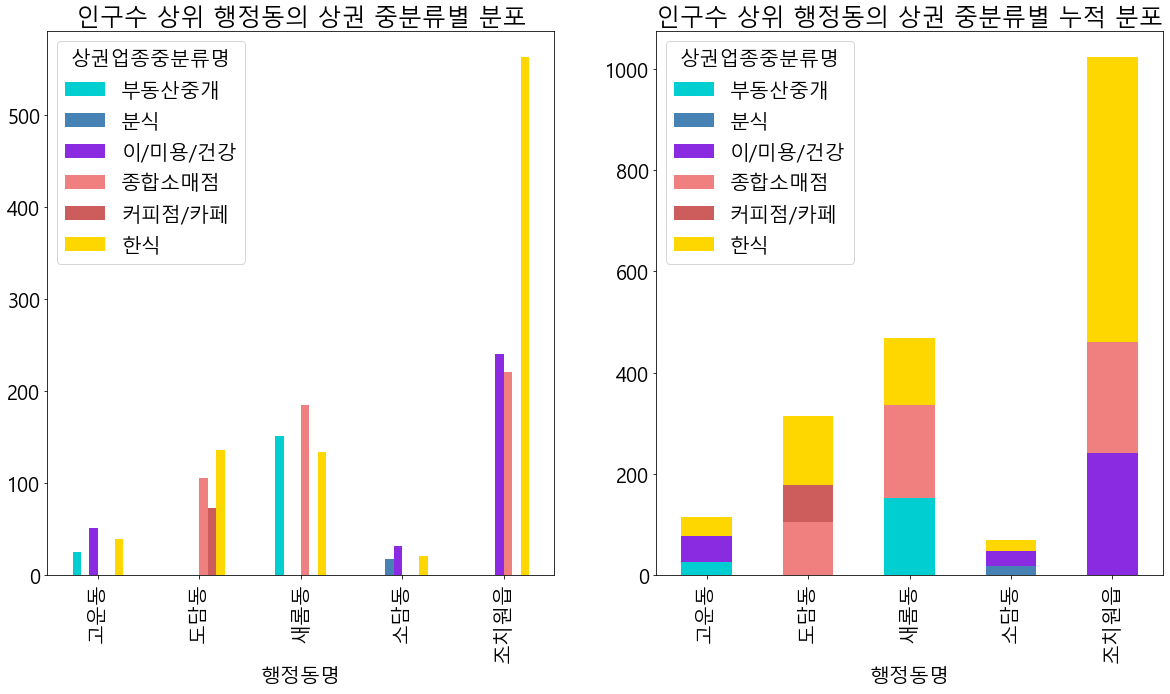

In [25]:
fig = plt.figure(figsize=(20, 10)) 
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2)
ax1.set_title('인구수 상위 행정동의 상권 중분류별 분포') 
ax2.set_title('인구수 상위 행정동의 상권 중분류별 누적 분포') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
colors = ['darkturquoise','steelblue','blueviolet','lightcoral','indianred','gold'] 
sum_ad_mid.set_index('상권업종중분류명',append=True)['count'].unstack().plot.bar(ax=ax1,color=colors)
sum_ad_mid.set_index('상권업종중분류명',append=True)['count'].unstack().plot.bar(ax=ax2,
                                                                         color=colors,stacked = True)

## 세종시 5개동 상권 업종 소분류 분석  

In [26]:
ad_area_sm=com_area[['행정동명','상권업종소분류명']]
ad_area_sm['count']=1
ad_gb_sm=ad_area_sm.groupby(['행정동명','상권업종소분류명'])['count'].count().reset_index()

<ipython-input-26-ca322fe723ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_area_sm['count']=1


In [27]:
saerom_cm_sm=ad_gb_sm[ad_gb_sm['행정동명']=='새롬동'].sort_values(['count'],ascending=False).head(3)
cho_cm_sm=ad_gb_sm[ad_gb_sm['행정동명']=='조치원읍'].sort_values(['count'],ascending=False).head(3)
do_cm_sm=ad_gb_sm[ad_gb_sm['행정동명']=='도담동'].sort_values(['count'],ascending=False).head(3)
go_cm_sm=ad_gb_sm[ad_gb_sm['행정동명']=='고운동'].sort_values(['count'],ascending=False).head(3)
so_cm_sm=ad_gb_sm[ad_gb_sm['행정동명']=='소담동'].sort_values(['count'],ascending=False).head(3)

sum_ad_sm=pd.concat([saerom_cm_sm,cho_cm_sm,do_cm_sm,go_cm_sm,so_cm_sm])
sum_ad_sm['count_sum'] = sum_ad_sm.groupby(['행정동명'])['count'].cumsum(axis=0)
sum_ad_sm = sum_ad_sm.set_index('행정동명')

<AxesSubplot:title={'center':'인구수 상위 행정동의 상권 소분류별 누적 분포'}, xlabel='행정동명'>

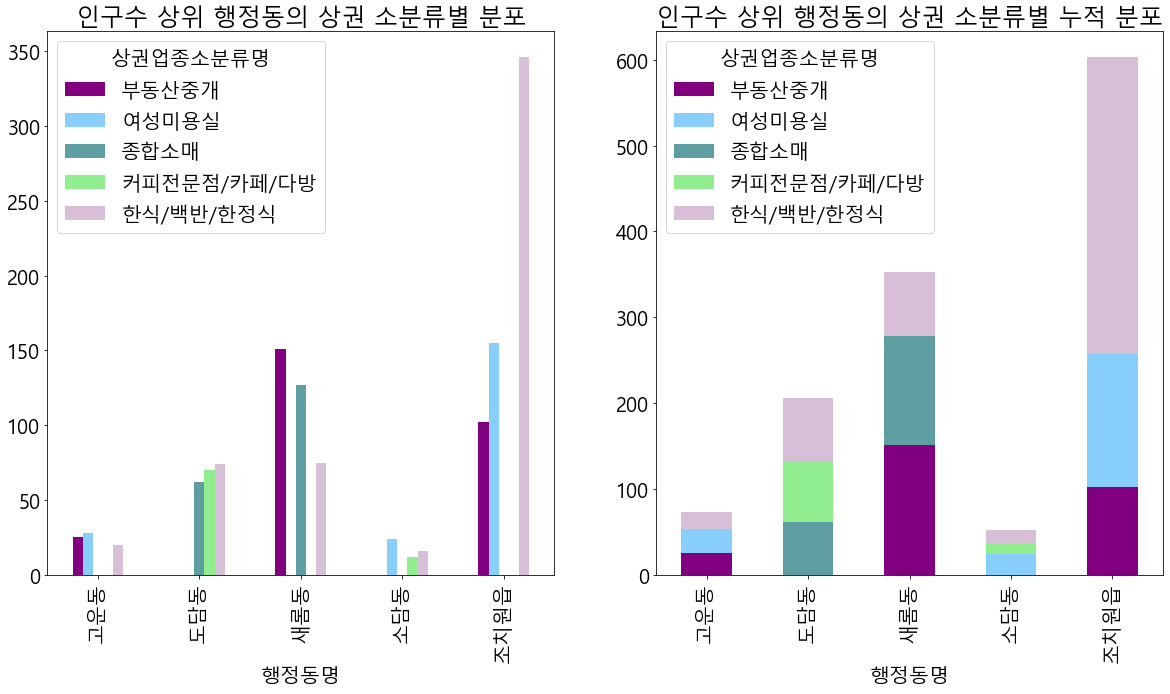

In [28]:

fig = plt.figure(figsize=(20, 10)) 
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2)
ax1.set_title('인구수 상위 행정동의 상권 소분류별 분포') 
ax2.set_title('인구수 상위 행정동의 상권 소분류별 누적 분포') 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20) 
colors=['purple','lightskyblue','cadetblue','lightgreen','thistle']
sum_ad_sm.set_index('상권업종소분류명',append=True)['count'].unstack().plot.bar(ax=ax1,color=colors)
sum_ad_sm.set_index('상권업종소분류명',append=True)['count'].unstack().plot.bar(ax=ax2,
                                                                         color=colors,stacked = True) 

In [29]:
sum_ad_sm

,상권업종소분류명,count,count_sum
행정동명,,,
새롬동,부동산중개,151,151
새롬동,종합소매,127,278
새롬동,한식/백반/한정식,75,353
조치원읍,한식/백반/한정식,346,346
조치원읍,여성미용실,155,501
조치원읍,부동산중개,102,603
도담동,한식/백반/한정식,74,74
도담동,커피전문점/카페/다방,70,144
도담동,종합소매,62,206


## 세종시 상권업종소분류명 지도로 표현 

In [32]:
# !pip install folium

In [36]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import os

import folium
from folium  import plugins
print(g.__version__)

0.12.1


In [37]:
small_gb_10 

,상권업종소분류명,count
370,한식/백반/한정식,1064
125,부동산중개,753
318,커피전문점/카페/다방,485
209,여성미용실,482
287,종합소매,302
340,편의점,264
392,후라이드/양념치킨,242
384,호프/맥주,232
91,라면김밥분식,215
307,청과물소매,202


### 조치원읍 부동산중개점 지도로 표현  

In [38]:
### 조치원읍의 부동산중개 보여주기 
com_area_rl=com_area[com_area['상권업종소분류명']=='부동산중개']
com_area_rl1=com_area_rl[com_area_rl['행정동명']=='조치원읍']
center_lat=com_area_rl['lat'].mean() 
center_lon=com_area_rl['lon'].mean() 
g_map=folium.Map(location=[center_lat,center_lon],zoom_start=11)

m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=10
)

with open('./Data/32.세종시_행정경계(읍면동).geojson',mode='rt',encoding='utf-8') as f:
    geo = json.loads(f.read())
    f.close()
    for lat,lon,name in zip(com_area_rl1['lat'],com_area_rl1['lon'],com_area_rl1['상권업종소분류명']): 
#     print(lat,lon,name) 
        saejong=folium.Marker([lat,lon],popup=name, icon= folium.Icon(icon='home',color='darkblue'))
        saejong.add_to(m)

m.save('map.html') 
m 

### 새롬동 부동산중개점 지도로 표현

In [40]:
### 새롬동의 부동산중개 보여주기 
com_area_rl=com_area[com_area['상권업종소분류명']=='부동산중개']
com_area_rl1=com_area_rl[com_area_rl['행정동명']=='새롬동']
center_lat=com_area_rl['lat'].mean() 
center_lon=com_area_rl['lon'].mean() 
g_map=folium.Map(location=[center_lat,center_lon],zoom_start=11)

m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=10
)

with open('./Data/32.세종시_행정경계(읍면동).geojson',mode='rt',encoding='utf-8') as f:
    geo = json.loads(f.read())
    f.close()
    for lat,lon,name in zip(com_area_rl1['lat'],com_area_rl1['lon'],com_area_rl1['상권업종소분류명']): 
#     print(lat,lon,name) 
        saejong=folium.Marker([lat,lon],popup=name, icon= folium.Icon(icon='home',color='darkblue'))
        saejong.add_to(m)

m.save('map.html') 
m 

### 세종시 부동산중개점 지도로 표현 

In [41]:
com_area_rl['count']=1 
com_area_rl1=com_area_rl.groupby(['행정동명']).count().reset_index()  
com_area_rl1=com_area_rl1[['행정동명','count']]
com_area_rl1 

<ipython-input-41-a8e34597df97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_area_rl['count']=1


,행정동명,count
0,고운동,25
1,금남면,91
2,대평동,2
3,도담동,50
4,보람동,19
5,부강면,14
6,새롬동,151
7,소담동,11
8,소정면,3
9,아름동,13


In [43]:
geo_path = './Data/32.세종시_행정경계(읍면동).geojson'
geo_str = json.load(open(geo_path, encoding='utf-8'))

center_lat=com_area_rl['lat'].mean()
center_lon=com_area_rl['lon'].mean() 

map = folium.Map(location=[center_lat, center_lon], zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = com_area_rl1,
               columns = ['행정동명','count'],
               fill_color = 'Blues', #PuRd, YlGnBu
               key_on='feature.properties.ADM_DR_NM',
               legend_name='부동산중개업종 분포'
               )
map

C:\Users\mmqq2\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


###  도담동읍 커피전문점/카페/다방 지도로 표현

In [44]:
com_area_co=com_area[com_area['상권업종소분류명']=='커피전문점/카페/다방']
com_area_co1=com_area_co[com_area_co['행정동명']=='도담동']
center_lat=com_area_co['lat'].mean()
center_lon=com_area_co['lon'].mean()

m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=10
)


for lat,lon,name in zip(com_area_co1['lat'],com_area_co1['lon'],com_area_co1['상권업종소분류명']): 
#     print(lat,lon,name) 
    saejong=folium.Marker([lat,lon],popup=name, icon= folium.Icon(color='green',icon='leaf'))
    saejong.add_to(m)

# folium.GeoJson(
#     geo,
#     name='seoul_municipalities'
# ).add_to(m)
m.save('map.html') 
m 

In [45]:
com_area_co['count']=1 
com_area_co1=com_area_co.groupby(['행정동명']).count().reset_index()  
com_area_co1=com_area_co1[['행정동명','count']]
com_area_co1 

<ipython-input-45-57767272c8b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_area_co['count']=1


,행정동명,count
0,고운동,18
1,금남면,27
2,대평동,7
3,도담동,70
4,보람동,28
5,부강면,10
6,새롬동,55
7,소담동,12
8,소정면,11
9,아름동,31


### 세종시 커피전문점/카페/다방 지도로 표현 

In [46]:
geo_path = './Data/32.세종시_행정경계(읍면동).geojson'
geo_str = json.load(open(geo_path, encoding='utf-8'))

center_lat=com_area_co['lat'].mean()
center_lon=com_area_co['lon'].mean() 

map = folium.Map(location=[center_lat, center_lon], zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = com_area_co1,
               columns = ['행정동명','count'],
               fill_color = 'Greens', #PuRd, YlGnBu
               key_on='feature.properties.ADM_DR_NM',
               legend_name='커피전문점/카페/다방'
               )
map

C:\Users\mmqq2\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
